# Ultimate Technologies Inc. Data Science Take-Home Challenge

# Part 1 - Exploratory data analysis

In [1]:
#load basic libraries
import os
import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# load logins.json file
with open('logins.json','r') as f:
    login_dict = json.load(f)
    dat = pd.DataFrame(login_dict)

In [3]:
dat.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [5]:
dat.login_time.value_counts() #there may multiple logins at the same time

1970-03-17 01:01:39    3
1970-01-09 01:31:25    3
1970-03-14 17:45:52    3
1970-03-29 03:24:57    3
1970-01-06 21:45:52    3
                      ..
1970-01-17 18:51:19    1
1970-04-05 23:55:16    1
1970-02-28 23:28:57    1
1970-03-06 11:47:18    1
1970-02-08 04:20:28    1
Name: login_time, Length: 92265, dtype: int64

In [6]:
dat.login_time = pd.to_datetime(dat.login_time)

In [7]:
dat = dat.assign(count=1)

In [8]:
t15 = dat.resample('15T',on='login_time').sum()

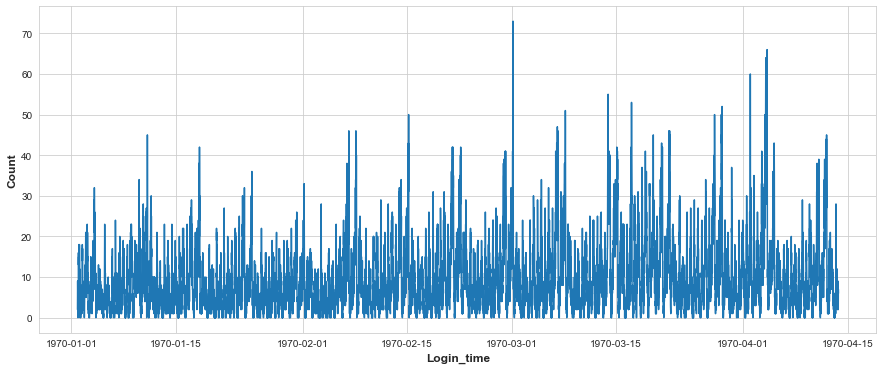

In [9]:
fig,ax=plt.subplots(figsize=(15,6))
sns.lineplot(t15.index,t15['count'])
ax.set_xlabel('Login_time',fontsize=12,fontdict=dict(weight='bold'))
ax.set_ylabel('Count',fontsize=12,fontdict=dict(weight='bold'))
plt.show()

From the above plot, it seems there are some cyclic behavior with some random spikes.

In [10]:
daily = dat.resample('D',on='login_time').sum()

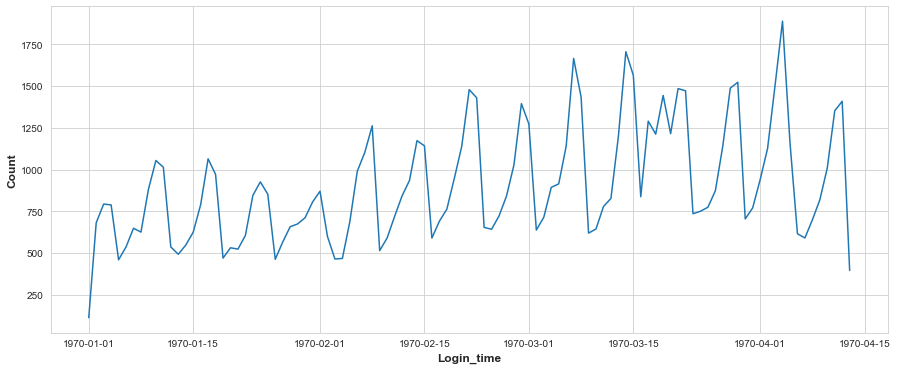

In [11]:
fig,ax=plt.subplots(figsize=(15,6))
sns.lineplot(daily.index,daily['count'])
ax.set_xlabel('Login_time',fontsize=12,fontdict=dict(weight='bold'))
ax.set_ylabel('Count',fontsize=12,fontdict=dict(weight='bold'))
plt.show()

From the above plot, it seems there are some cyclic behavior with a period of about 6-7 days. 

# Part 2 - Experiment and metrics design

1. I would choose the increases in mean toll costs after the change as the key measure of success of this experiment;

2. 
a) I would collect data related to the toll costs 1 year prior to the change, and 1 year after the change. 
b) I would calculate the mean toll costs over the year prior to the change, and the mean toll costs over the year after the change; then I would use a t-test to verify the significance of the observation. 
c) If the results of t-test indicate there is significant statistical eviddence that the mean toll costs increase after the change, then we can conclude that the change is effective, and we can recommend the city operations team to continue with the change. Otherwise, the change may not be sufficiently effective, and other strategies may be needed to achieve the goal. 



# Part 3 - Predictive modeling

## 3.1. Data Wrangling and Exploratory Data Analysis

In [12]:
with open('ultimate_data_challenge.json','r') as f:
    dat_dict = json.load(f)
    dat = pd.DataFrame(dat_dict)

In [13]:
dat.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


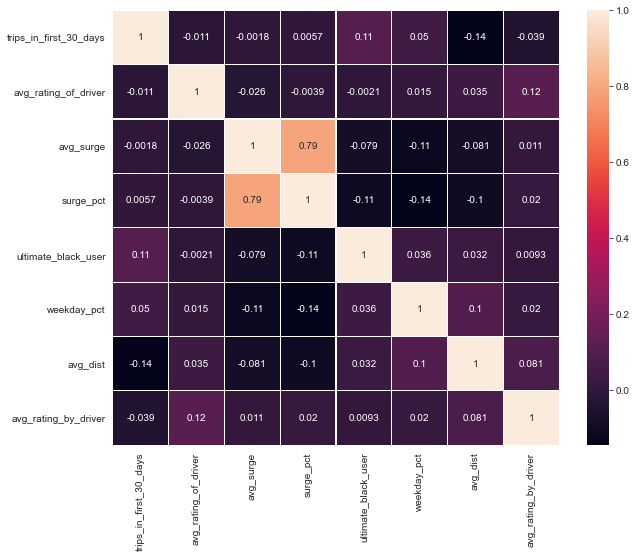

In [15]:
#Calculate the correlation coefficients
corr = dat.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(10,8))
_=sns.heatmap(corr,linewidths=.1, annot=True)

In [16]:
dat = dat.drop(columns=['phone'],axis=1)

In [17]:
dat.avg_rating_of_driver.fillna(dat.avg_rating_of_driver.mean(),inplace=True)

In [18]:
dat.avg_rating_by_driver.fillna(dat.avg_rating_by_driver.mean(),inplace=True)

In [19]:
dat.signup_date = pd.to_datetime(dat.signup_date)

In [20]:
dat.last_trip_date = pd.to_datetime(dat.last_trip_date)

In [21]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(1)
memory usage: 3.9+ MB


## The fraction of retained users:

In [22]:
dat['retained'] = np.where(dat['trips_in_first_30_days']>0,1,0)

In [23]:
pct = dat.retained.value_counts(normalize=True)
pct

1    0.6922
0    0.3078
Name: retained, dtype: float64

In [24]:
print('The fraction of retained users is:{:.3f}'.format(pct[1]))

The fraction of retained users is:0.692


## 3.2. Predictive Modeling

In [25]:
dat.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,1


In [26]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
 11  retained                50000 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(6), int

## Define the target variable: 'active_6'
if a user is active in the 6th month on the system, then the last_trip_date would be >= signup_date + [(6-1)-1]Months

In [27]:
dat['active_6'] = np.where(dat.last_trip_date >= (dat.signup_date + pd.DateOffset(months=4)),1,0)

In [28]:
dat.active_6.value_counts(normalize=True)

0    0.54434
1    0.45566
Name: active_6, dtype: float64

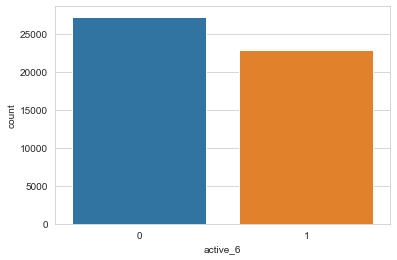

In [29]:
_=sns.countplot(x='active_6',data=dat, order = dat['active_6'].value_counts().index)

## Select predictor variables: 
* selected: avg_dist, avg_rating_by_driver, avg_rating_of_driver, surge_pct, avg_surge, trips_in_first_30_days, ultimate_black_user, weekday_pct
* excluded: city, phone, signup_date, last_trip_date,retained

In [30]:
dat2 = dat.drop(['city','signup_date','last_trip_date','retained'],axis=1)

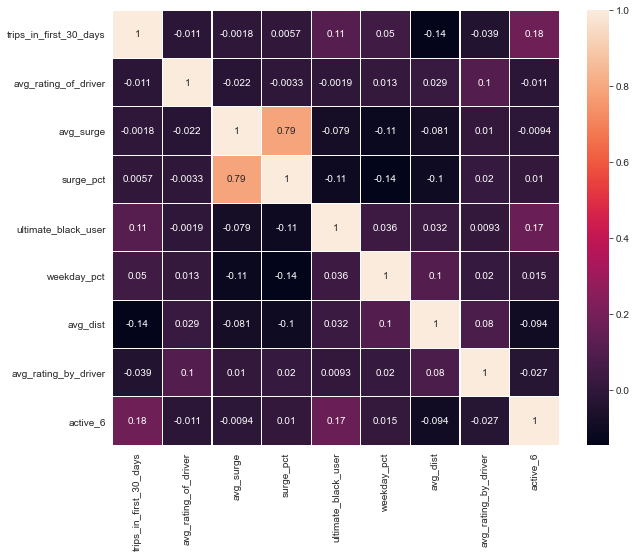

In [31]:
#Calculate the correlation coefficients
corr = dat2.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(10,8))
_=sns.heatmap(corr,linewidths=.1, annot=True)

### 3.2.1. Pre-processing and training data preparation

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
#create dummy features for 'ultimate_black_user'
dat3 = pd.get_dummies(dat2,columns=['ultimate_black_user'],drop_first=True)
dat3.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_6,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0


In [34]:
#split data into training and test set
y = dat3.active_6
X = dat3.drop('active_6',axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, stratify=y, random_state=52)

In [35]:
#build scaler based on training set and apply it to test set
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### 3.2.2. Modeling

In [36]:
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score, matthews_corrcoef,roc_curve, precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import time

In [37]:
# define a function to calculate and store metrics
def model_eval(model,name,X_test,y_test,y_pred):
    pfm = {'model':name}
    pfm['times'] = round(time.time()-start_time,4)
    precision,recall,fscore,support = score(y_test, y_pred, pos_label=1, average='binary')
    pfm['precision'] = round(precision,3)
    pfm['recall'] = round(recall,3)
    pfm['accuracy'] = round(accuracy_score(y_test,y_pred),3)
    pfm['mcc'] = round(matthews_corrcoef(y_test,y_pred),3)
    y_prob = model.predict_proba(X_test)[:,1] # output positive class prediction probabilities
    fpr,tpr,threshold = roc_curve(y_test,y_prob)
    pfm['roc_auc'] = round(auc(fpr,tpr),3)
    print('--- %s seconds ---' % pfm['times'])
    print('Precision:{precision} / Recall:{recall} / Accuracy:{accuracy} / MCC:{mcc} / ROC_AUC:{roc_auc}'.format(**pfm))
    return pfm

### Naive Bayes Classifier

In [38]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

# Instantiate a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training set
gnb.fit(X_train,y_train)

# Predict output
y_pred = gnb.predict(X_test)

gnb_pfm = model_eval(gnb,'GaussianNaiveBayes',X_test,y_test,y_pred)

--- 0.0147 seconds ---
Precision:0.561 / Recall:0.749 / Accuracy:0.618 / MCC:0.263 / ROC_AUC:0.697


### Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

lr = LogisticRegression(random_state=52,max_iter=300)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

lr_pfm = model_eval(lr,'LogisticRegression',X_test_scaled,y_test,y_pred)

--- 0.0222 seconds ---
Precision:0.594 / Recall:0.466 / Accuracy:0.611 / MCC:0.207 / ROC_AUC:0.634


### kNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

knn_pfm = model_eval(knn,'kNN',X_test_scaled,y_test,y_pred)

--- 0.8613 seconds ---
Precision:0.682 / Recall:0.664 / Accuracy:0.706 / MCC:0.405 / ROC_AUC:0.764


### SVM

In [41]:
from sklearn.svm import SVC

start_time = time.time()

svm = SVC(probability=True,random_state=52)
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)

svm_pfm = model_eval(svm,'SVM',X_test_scaled,y_test,y_pred)

--- 139.5844 seconds ---
Precision:0.718 / Recall:0.63 / Accuracy:0.719 / MCC:0.43 / ROC_AUC:0.791


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()

dt = DecisionTreeClassifier(random_state=52)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

dt_pfm = model_eval(dt,'DecisionTree',X_test,y_test,y_pred)

--- 0.1057 seconds ---
Precision:0.645 / Recall:0.613 / Accuracy:0.67 / MCC:0.332 / ROC_AUC:0.666


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

rf = RandomForestClassifier(random_state=52)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rf_pfm = model_eval(rf,'RandomForest',X_test,y_test,y_pred)

--- 2.6899 seconds ---
Precision:0.68 / Recall:0.703 / Accuracy:0.714 / MCC:0.424 / ROC_AUC:0.783


### XGBoost

In [44]:
from xgboost import XGBClassifier

start_time = time.time()

xgb = XGBClassifier(random_state=52)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

xgb_pfm = model_eval(xgb,'XGBoost',X_test,y_test,y_pred)

--- 0.5472 seconds ---
Precision:0.741 / Recall:0.666 / Accuracy:0.742 / MCC:0.477 / ROC_AUC:0.826


### LightGBM

In [45]:
import lightgbm as lgb

start_time = time.time()

lgb = lgb.LGBMClassifier(objective='binary',random_state=52)
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

lgb_pfm = model_eval(lgb,'LightGBM',X_test,y_test,y_pred)

/Users/hhl/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


--- 0.188 seconds ---
Precision:0.753 / Recall:0.66 / Accuracy:0.746 / MCC:0.486 / ROC_AUC:0.83


### Compare model performance

In [46]:
df = [gnb_pfm,
       lr_pfm,
       knn_pfm,
       svm_pfm,
       dt_pfm,
       rf_pfm,
       xgb_pfm,
       lgb_pfm]

cols = ['model', 'precision', 'recall', 'accuracy', 'mcc', 'roc_auc', 'times']
df = pd.DataFrame(df)[cols]
display(df)

,model,precision,recall,accuracy,mcc,roc_auc,times
0,GaussianNaiveBayes,0.561,0.749,0.618,0.263,0.697,0.0147
1,LogisticRegression,0.594,0.466,0.611,0.207,0.634,0.0222
2,kNN,0.682,0.664,0.706,0.405,0.764,0.8613
3,SVM,0.718,0.630,0.719,0.430,0.791,139.5844
4,DecisionTree,0.645,0.613,0.670,0.332,0.666,0.1057
5,RandomForest,0.680,0.703,0.714,0.424,0.783,2.6899
6,XGBoost,0.741,0.666,0.742,0.477,0.826,0.5472
7,LightGBM,0.753,0.660,0.746,0.486,0.830,0.1880


### 3.2.3. Model optimization: random forest, XGBoost, LightGBM

In [47]:
rf2 = RandomForestClassifier(random_state=52)

param_grid = {'n_estimators':[50,100,200],
                'max_depth':[5,10,15,None],
                'max_features':['sqrt'],
                'min_samples_split':[3,5],
                'min_impurity_decrease':[0],
                 'bootstrap':[True]
                }
    
grid_rf = GridSearchCV(rf2, param_grid = param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_rf.fit(X_train,y_train)
y_pred = grid_rf.predict(X_test)

grid_rf_pfm = model_eval(grid_rf,'RandomForest_tuned',X_test,y_test,y_pred)
print('Tuned hyperparameters:',grid_rf.best_params_)

--- 188.2264 seconds ---
Precision:0.735 / Recall:0.655 / Accuracy:0.735 / MCC:0.464 / ROC_AUC:0.82
Tuned hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_split': 3, 'n_estimators': 100}


In [48]:
xgb2 = XGBClassifier(random_state=52)
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.15,0.2],
                'max_depth':[5]
                }

grid_xgb = GridSearchCV(xgb2, param_grid = param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_xgb.fit(X_train,y_train)
y_pred = grid_xgb.predict(X_test)

grid_xgb_pfm = model_eval(grid_xgb,'XGBoost_tuned',X_test,y_test,y_pred)
print('Tuned hyperparameters:',grid_xgb.best_params_)

--- 199.0729 seconds ---
Precision:0.751 / Recall:0.658 / Accuracy:0.744 / MCC:0.483 / ROC_AUC:0.827
Tuned hyperparameters: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100}


In [49]:
import lightgbm as lgb
lgb2 = lgb.LGBMClassifier(objective='binary',random_state=52)
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.05,0.1,0.15],
                'max_depth':[5]
                }
grid_lgb = GridSearchCV(lgb2, param_grid = param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_lgb.fit(X_train,y_train)
y_pred = grid_lgb.predict(X_test)

grid_lgb_pfm = model_eval(grid_lgb,'LightGBM_tuned',X_test,y_test,y_pred)
print('Tuned hyperparameters:',grid_lgb.best_params_)

--- 203.2447 seconds ---
Precision:0.749 / Recall:0.657 / Accuracy:0.743 / MCC:0.48 / ROC_AUC:0.827
Tuned hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [50]:
#Comparing model performance with and without hyperparameter tuning
c_pfm = [rf_pfm, grid_rf_pfm,
      xgb_pfm, grid_xgb_pfm,
        lgb_pfm,grid_lgb_pfm]

cols = ['model', 'precision', 'recall', 'accuracy', 'mcc', 'roc_auc']
c_pfm = pd.DataFrame(c_pfm)[cols]
display(c_pfm)

,model,precision,recall,accuracy,mcc,roc_auc
0,RandomForest,0.680,0.703,0.714,0.424,0.783
1,RandomForest_tuned,0.735,0.655,0.735,0.464,0.820
2,XGBoost,0.741,0.666,0.742,0.477,0.826
3,XGBoost_tuned,0.751,0.658,0.744,0.483,0.827
4,LightGBM,0.753,0.660,0.746,0.486,0.830
5,LightGBM_tuned,0.749,0.657,0.743,0.480,0.827


### 3.2.4. Final Model

In [51]:
start_time = time.time()

import lightgbm as lgb

lgb_final = lgb.LGBMClassifier(objective='binary',random_state=52)
lgb_final.fit(X_train,y_train)
y_pred = lgb_final.predict(X_test)

lgb_final_pfm = model_eval(lgb_final,'LightGBM',X_test,y_test,y_pred)

--- 0.2366 seconds ---
Precision:0.753 / Recall:0.66 / Accuracy:0.746 / MCC:0.486 / ROC_AUC:0.83


### 3.2.5. Feature Importance

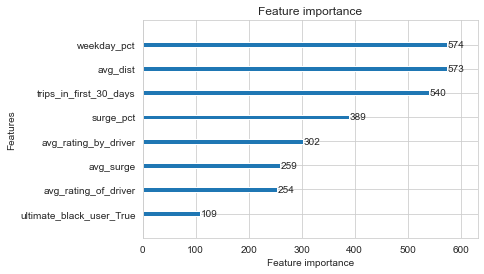

In [52]:
import lightgbm as lgb
_=lgb.plot_importance(lgb_final)

## 4. Conclusions

* A comparison of eight binary classifiers suggested that random forest, XGBoost, and LightGBM were among the models with top performance. The three models were further optimized via hyperparameter tuning. The results of hyperparameter tuning suggested that LightGBM with default settings returned highest accuracy, mcc, and roc_auc scores. Therefore, LgithGBM was seleted as the final model, which had an accuracy score of 0.746. 

* Feature importance analyses results suggested that the top 3 important features to the prediction of active users were 'weekday_pct', 'avg_dist', and 'trips_in_first_30_days'. Based on this, we may suggest to increase the average distance in miles per trip taken in the first 30 days after signup, and the number of trips a user took in the first 30 days after signing up. This may include offering discounts after initial signup. 